In [21]:
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import precision_score,f1_score,recall_score,classification_report,accuracy_score
import joblib
from imblearn.over_sampling import SMOTE
from tqdm import tqdm

In [22]:
df = data_tst=pd.read_csv("D:\streamlit_ppp4\mcyber\GUIDE_Test.csv")

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\shalu\AppData\Local\Temp\ipykernel_16524\54247886.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = data_tst=pd.read_csv("D:\streamlit_ppp4\mcyber\GUIDE_Test.csv")


In [23]:
data_tst.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,IpAddress,Url,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueData,ApplicationId,OAuthApplicationId,FileName,ResourceIdName,City,Usage,Day,Month,Year,Hour,Time
0,1245540519230,657,11767,87199,524,563,11,0,28,0,98799,360606,160396,863,153085,529644,1631,860,2251,881,289573,3586,10630,0,4,6,2024,22,82520
1,1400159342154,3,91158,632273,2,2,1,0,15,0,1239,360606,160396,453297,2833,529644,1631,860,2251,881,289573,3586,10630,1,3,6,2024,12,46649
2,1279900255923,145,32247,131719,2932,10807,11,0,23,1,98799,360606,160396,453297,153085,529644,1631,860,2251,881,14,3586,10630,1,8,6,2024,3,12037
3,60129547292,222,15294,917686,0,0,10,1,7,1,98799,360606,160396,453297,153085,529644,1631,860,2251,881,289573,3586,10630,1,12,6,2024,12,43594
4,515396080539,363,7615,5944,27,18,5,0,28,0,98799,360606,160396,136104,153085,529644,1631,860,2251,881,289573,3586,10630,1,6,6,2024,17,63665


In [24]:
list(data_tst.columns)

['Id',
 'OrgId',
 'IncidentId',
 'AlertId',
 'DetectorId',
 'AlertTitle',
 'Category',
 'IncidentGrade',
 'EntityType',
 'EvidenceRole',
 'DeviceId',
 'IpAddress',
 'Url',
 'AccountName',
 'DeviceName',
 'NetworkMessageId',
 'RegistryKey',
 'RegistryValueData',
 'ApplicationId',
 'OAuthApplicationId',
 'FileName',
 'ResourceIdName',
 'City',
 'Usage',
 'Day',
 'Month',
 'Year',
 'Hour',
 'Time']

In [25]:
pd.set_option('display.max_columns', None)
data_tst.head(1)

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,IpAddress,Url,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueData,ApplicationId,OAuthApplicationId,FileName,ResourceIdName,City,Usage,Day,Month,Year,Hour,Time
0,1245540519230,657,11767,87199,524,563,11,0,28,0,98799,360606,160396,863,153085,529644,1631,860,2251,881,289573,3586,10630,0,4,6,2024,22,82520


In [26]:
data_tst.shape

(3922695, 29)

In [27]:
data_tst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3922695 entries, 0 to 3922694
Data columns (total 29 columns):
 #   Column              Dtype
---  ------              -----
 0   Id                  int64
 1   OrgId               int64
 2   IncidentId          int64
 3   AlertId             int64
 4   DetectorId          int64
 5   AlertTitle          int64
 6   Category            int64
 7   IncidentGrade       int64
 8   EntityType          int64
 9   EvidenceRole        int64
 10  DeviceId            int64
 11  IpAddress           int64
 12  Url                 int64
 13  AccountName         int64
 14  DeviceName          int64
 15  NetworkMessageId    int64
 16  RegistryKey         int64
 17  RegistryValueData   int64
 18  ApplicationId       int64
 19  OAuthApplicationId  int64
 20  FileName            int64
 21  ResourceIdName      int64
 22  City                int64
 23  Usage               int64
 24  Day                 int64
 25  Month               int64
 26  Year          

**data handling** *italicized text*

In [28]:
threshold= len(data_tst)* 0.5   # removing 50% above null value
data_tst=data_tst.dropna(thresh=threshold,axis=1)

In [29]:
data_tst.shape

(3922695, 29)

In [30]:
data_tst.duplicated().sum()

np.int64(218668)

In [31]:
data_tst.drop_duplicates(inplace=True)

In [32]:
data_tst

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,IpAddress,Url,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueData,ApplicationId,OAuthApplicationId,FileName,ResourceIdName,City,Usage,Day,Month,Year,Hour,Time
0,1245540519230,657,11767,87199,524,563,11,0,28,0,98799,360606,160396,863,153085,529644,1631,860,2251,881,289573,3586,10630,0,4,6,2024,22,82520
1,1400159342154,3,91158,632273,2,2,1,0,15,0,1239,360606,160396,453297,2833,529644,1631,860,2251,881,289573,3586,10630,1,3,6,2024,12,46649
2,1279900255923,145,32247,131719,2932,10807,11,0,23,1,98799,360606,160396,453297,153085,529644,1631,860,2251,881,14,3586,10630,1,8,6,2024,3,12037
3,60129547292,222,15294,917686,0,0,10,1,7,1,98799,360606,160396,453297,153085,529644,1631,860,2251,881,289573,3586,10630,1,12,6,2024,12,43594
4,515396080539,363,7615,5944,27,18,5,0,28,0,98799,360606,160396,136104,153085,529644,1631,860,2251,881,289573,3586,10630,1,6,6,2024,17,63665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3922690,171798692464,42,391,638112,135,7322,12,0,15,0,4,360606,160396,453297,4,529644,1631,860,2251,881,289573,3586,10630,1,3,6,2024,20,73420
3922691,541165881145,262,3017,227156,139,120,10,0,28,0,98799,360606,160396,14567,153085,529644,1631,860,2251,881,289573,3586,10630,1,4,6,2024,3,13978
3922692,438086666953,1323,31001,304819,219,196,10,0,28,0,98799,360606,160396,107151,153085,529644,1631,860,2251,881,289573,3586,10630,0,4,6,2024,19,70279
3922693,1297080124487,47,3653,7243,57,29,1,1,12,1,98799,1084,160396,453297,153085,529644,1631,860,2251,881,289573,3586,10630,1,15,6,2024,0,3020


In [33]:
data_tst.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3704027 entries, 0 to 3922694
Data columns (total 29 columns):
 #   Column              Dtype
---  ------              -----
 0   Id                  int64
 1   OrgId               int64
 2   IncidentId          int64
 3   AlertId             int64
 4   DetectorId          int64
 5   AlertTitle          int64
 6   Category            int64
 7   IncidentGrade       int64
 8   EntityType          int64
 9   EvidenceRole        int64
 10  DeviceId            int64
 11  IpAddress           int64
 12  Url                 int64
 13  AccountName         int64
 14  DeviceName          int64
 15  NetworkMessageId    int64
 16  RegistryKey         int64
 17  RegistryValueData   int64
 18  ApplicationId       int64
 19  OAuthApplicationId  int64
 20  FileName            int64
 21  ResourceIdName      int64
 22  City                int64
 23  Usage               int64
 24  Day                 int64
 25  Month               int64
 26  Year               

In [34]:
#mode imputation because of catagorial columns

data_tst["IncidentGrade"].fillna(data_tst["IncidentGrade"].mode()[0],inplace=True)

C:\Users\shalu\AppData\Local\Temp\ipykernel_16524\3464894523.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_tst["IncidentGrade"].fillna(data_tst["IncidentGrade"].mode()[0],inplace=True)


In [38]:
if 'Timestamp' in df.columns:
    # Indented block starts here
    print("Timestamp column found.")
    # You can add more logic here
else:
    print("Timestamp column not found.")


Timestamp column not found.


In [39]:
data_tst['Timestamp']=pd.to_datetime(data_tst['Timestamp']) # data clean Timestamp

KeyError: 'Timestamp'

In [ ]:
data_tst['Timestamp'].head()

0   2024-06-04 22:56:27+00:00
1   2024-06-03 12:58:26+00:00
2   2024-06-08 03:20:49+00:00
3   2024-06-12 12:07:31+00:00
4   2024-06-06 17:42:05+00:00
Name: Timestamp, dtype: datetime64[ns, UTC]

In [ ]:
data_tst["Day"]=data_tst["Timestamp"].dt.day
data_tst["Month"]=data_tst["Timestamp"].dt.month
data_tst["Year"]=data_tst["Timestamp"].dt.year
data_tst["Hour"]=data_tst["Timestamp"].dt.hour
data_tst["Time"]=data_tst["Timestamp"].dt.time

In [ ]:
[features for features in data_tst.columns if data_tst[features].isnull().sum()>0]

[]

In [ ]:
data_tst.drop("Timestamp",axis=1,inplace=True)  # doprring timestamp column
print(data_tst.head())

              Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle  \
0  1245540519230    657       11767    87199         524         563   
1  1400159342154      3       91158   632273           2           2   
2  1279900255923    145       32247   131719        2932       10807   
3    60129547292    222       15294   917686           0           0   
4   515396080539    363        7615     5944          27          18   

            Category   IncidentGrade         EntityType EvidenceRole  \
0    LateralMovement  BenignPositive               User     Impacted   
1  CommandAndControl  BenignPositive            Machine     Impacted   
2    LateralMovement  BenignPositive            Process      Related   
3      InitialAccess   FalsePositive  CloudLogonSession      Related   
4          Discovery  BenignPositive               User     Impacted   

   DeviceId  Sha256  IpAddress     Url  AccountSid  AccountUpn  \
0     98799  138268     360606  160396        2610        3699   
1 

In [ ]:
pd.set_option("display.max_columns", None)
data_tst.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Usage,Day,Month,Year,Hour,Time
0,1245540519230,657,11767,87199,524,563,LateralMovement,BenignPositive,User,Impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Private,4,6,2024,22,22:56:27
1,1400159342154,3,91158,632273,2,2,CommandAndControl,BenignPositive,Machine,Impacted,1239,138268,360606,160396,441377,673934,425863,453297,2833,529644,1631,635,860,2251,3421,881,289573,117668,3586,0,0,242,1445,10630,Public,3,6,2024,12,12:58:26
2,1279900255923,145,32247,131719,2932,10807,LateralMovement,BenignPositive,Process,Related,98799,4296,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,14,22,3586,5,66,242,1445,10630,Public,8,6,2024,3,03:20:49
3,60129547292,222,15294,917686,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public,12,6,2024,12,12:07:31
4,515396080539,363,7615,5944,27,18,Discovery,BenignPositive,User,Impacted,98799,138268,360606,160396,133549,673934,425863,136104,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public,6,6,2024,17,17:42:05


In [ ]:
data_tst['IncidentGrade'].value_counts()

IncidentGrade
BenignPositive    1630942
TruePositive      1422856
FalsePositive      868897
Name: count, dtype: int64

In [ ]:
data_tst.IncidentGrade.unique()

array(['BenignPositive', 'FalsePositive', 'TruePositive'], dtype=object)

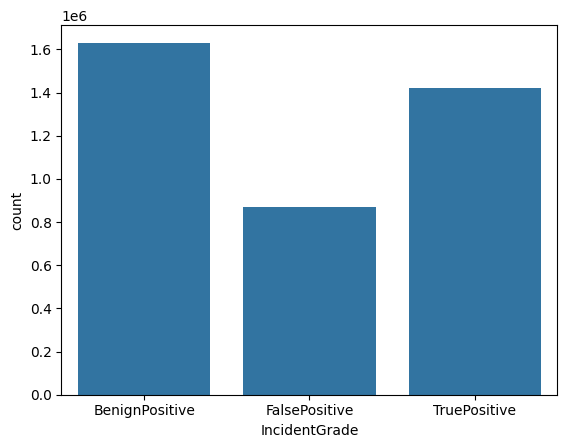

In [ ]:
# Distribution of target variable
sns.countplot(x="IncidentGrade", data=data_tst)
plt.show()

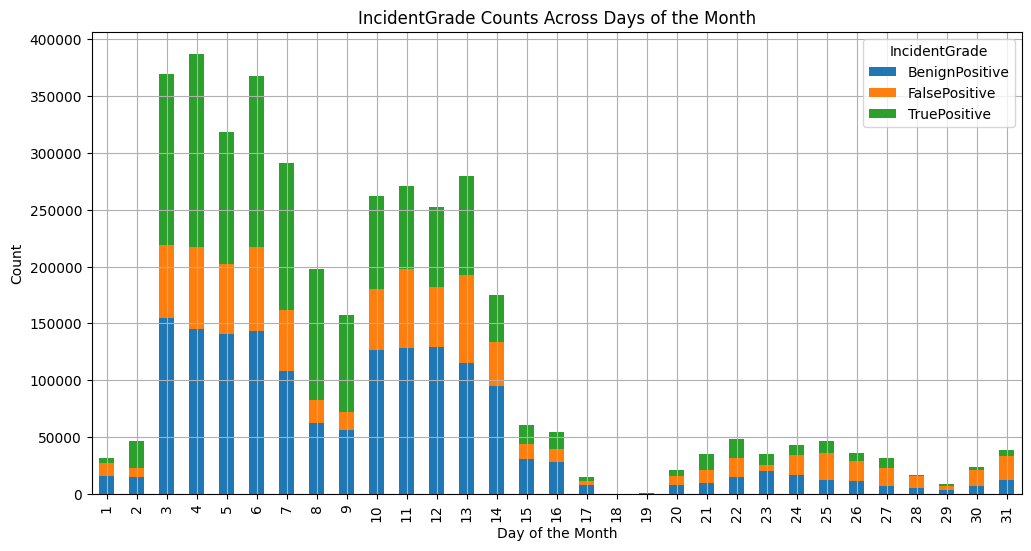

In [ ]:
# Aggregate data
day_incident_grade = data_tst.groupby(['Day', 'IncidentGrade']).size().unstack()

# Plot
day_incident_grade.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Days of the Month')
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()

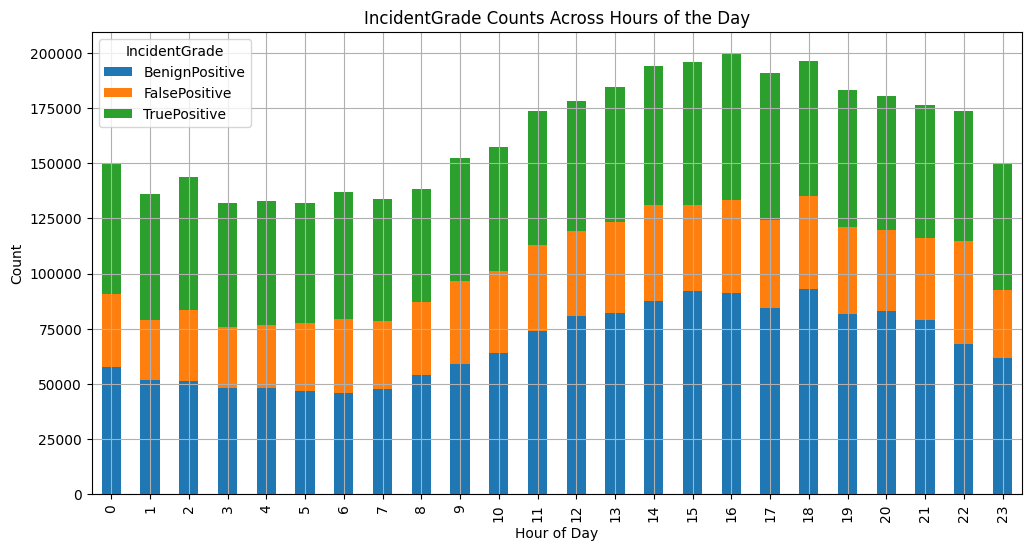

In [ ]:
# Aggregate data

hour_incident =data_tst.groupby(['Hour', 'IncidentGrade']).size().unstack()

hour_incident.plot(kind='bar', stacked=True, figsize=(12,6))
plt.xlabel("Hour of Day")
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Hours of the Day')
plt.legend(title="IncidentGrade")
plt.grid(True)
plt.show()


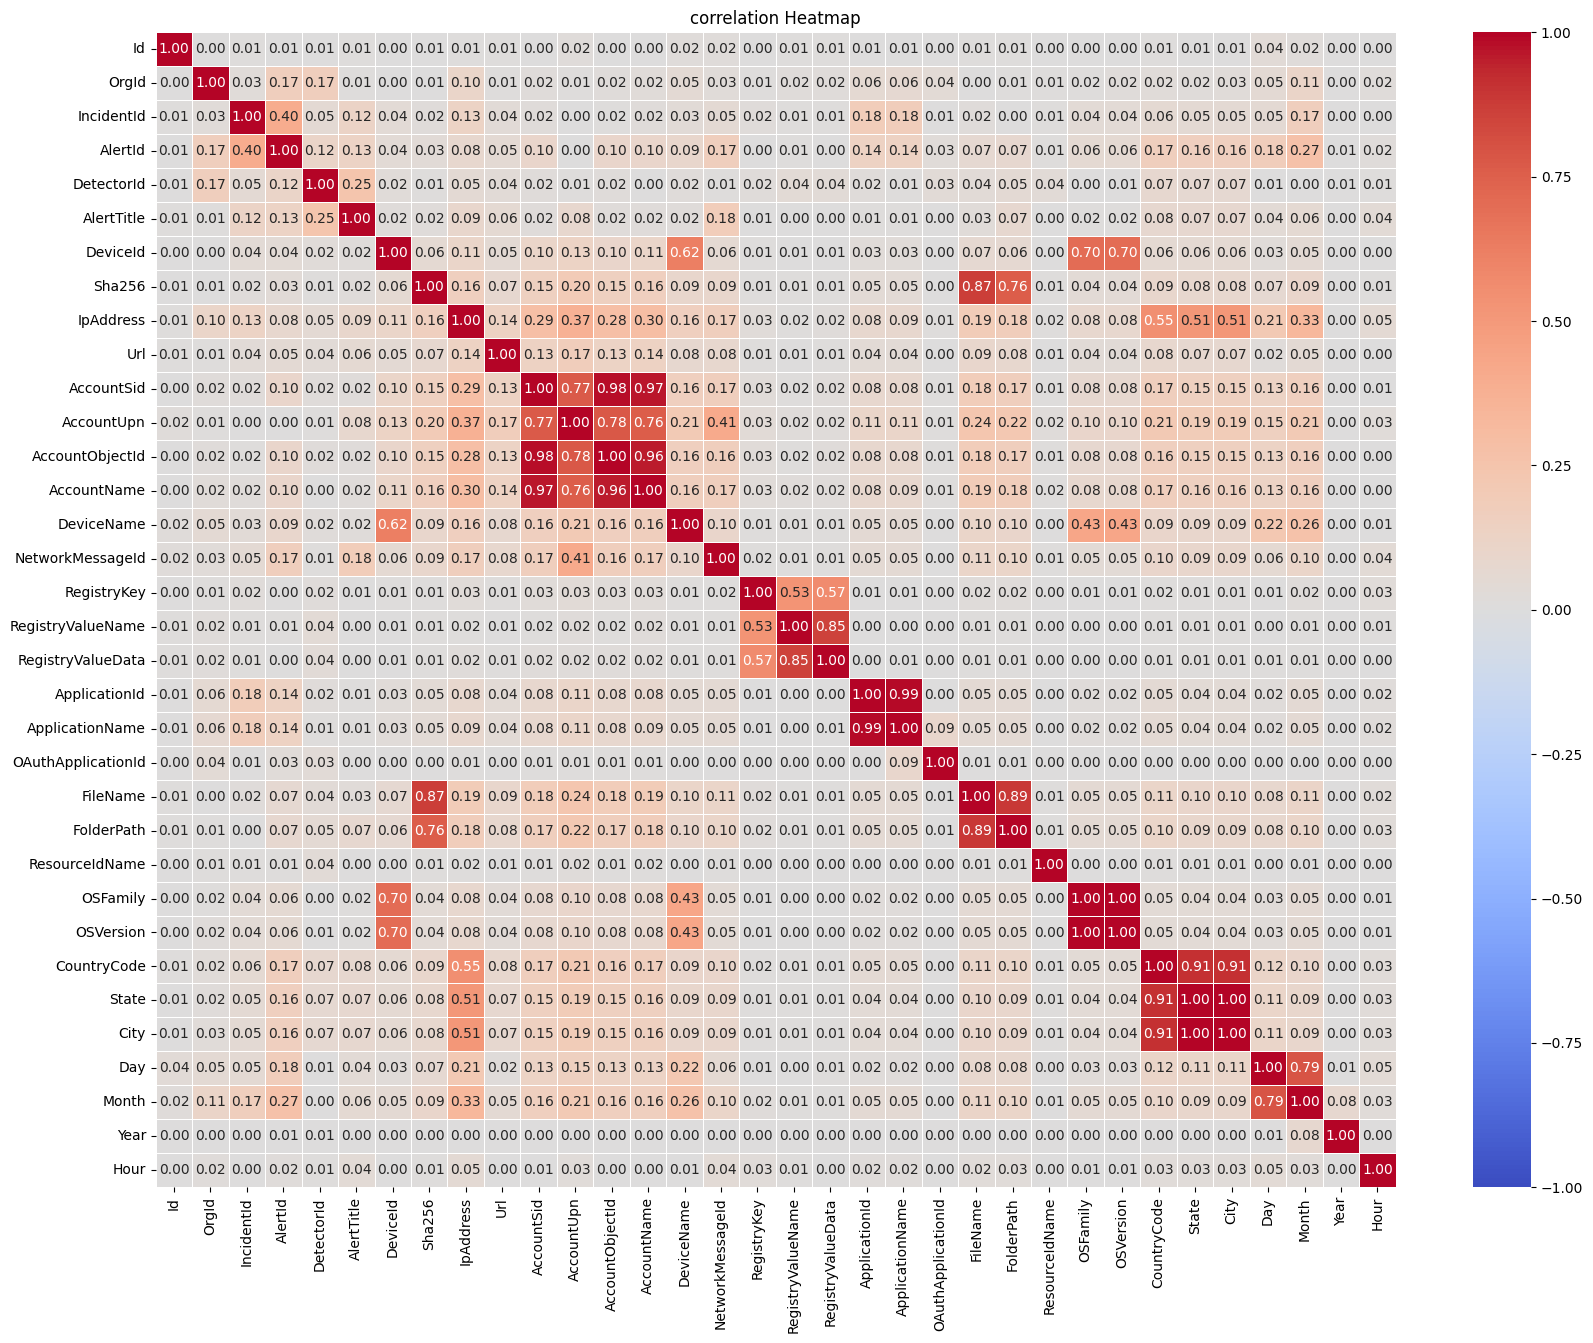

In [ ]:
# selecting numerical col
numeric_df=data_tst.select_dtypes(include=['number'])

corr_matrix= numeric_df.corr().abs()

# plot the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, linewidths=0.5)
plt.title('correlation Heatmap')
plt.show()

In [ ]:
# dropping 70% above correlated columns
data_tst.drop(["CountryCode","Sha256","ApplicationName","RegistryValueName","AccountSid","OSFamily","OSVersion","AccountObjectId","State","FolderPath","AccountUpn"], axis =1 , inplace = True)

In [ ]:
data_tst

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,IpAddress,Url,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueData,ApplicationId,OAuthApplicationId,FileName,ResourceIdName,City,Usage,Day,Month,Year,Hour,Time
0,1245540519230,657,11767,87199,524,563,LateralMovement,BenignPositive,User,Impacted,98799,360606,160396,863,153085,529644,1631,860,2251,881,289573,3586,10630,Private,4,6,2024,22,22:56:27
1,1400159342154,3,91158,632273,2,2,CommandAndControl,BenignPositive,Machine,Impacted,1239,360606,160396,453297,2833,529644,1631,860,2251,881,289573,3586,10630,Public,3,6,2024,12,12:58:26
2,1279900255923,145,32247,131719,2932,10807,LateralMovement,BenignPositive,Process,Related,98799,360606,160396,453297,153085,529644,1631,860,2251,881,14,3586,10630,Public,8,6,2024,3,03:20:49
3,60129547292,222,15294,917686,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,98799,360606,160396,453297,153085,529644,1631,860,2251,881,289573,3586,10630,Public,12,6,2024,12,12:07:31
4,515396080539,363,7615,5944,27,18,Discovery,BenignPositive,User,Impacted,98799,360606,160396,136104,153085,529644,1631,860,2251,881,289573,3586,10630,Public,6,6,2024,17,17:42:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147985,171798692464,42,391,638112,135,7322,Malware,BenignPositive,Machine,Impacted,4,360606,160396,453297,4,529644,1631,860,2251,881,289573,3586,10630,Public,3,6,2024,20,20:24:41
4147987,541165881145,262,3017,227156,139,120,InitialAccess,BenignPositive,User,Impacted,98799,360606,160396,14567,153085,529644,1631,860,2251,881,289573,3586,10630,Public,4,6,2024,3,03:53:15
4147988,438086666953,1323,31001,304819,219,196,InitialAccess,BenignPositive,User,Impacted,98799,360606,160396,107151,153085,529644,1631,860,2251,881,289573,3586,10630,Private,4,6,2024,19,19:32:19
4147989,1297080124487,47,3653,7243,57,29,CommandAndControl,FalsePositive,Ip,Related,98799,1084,160396,453297,153085,529644,1631,860,2251,881,289573,3586,10630,Public,15,6,2024,0,00:50:22


In [ ]:
#encoding
data_tst.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3922695 entries, 0 to 4147990
Data columns (total 29 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Id                  int64 
 1   OrgId               int64 
 2   IncidentId          int64 
 3   AlertId             int64 
 4   DetectorId          int64 
 5   AlertTitle          int64 
 6   Category            object
 7   IncidentGrade       object
 8   EntityType          object
 9   EvidenceRole        object
 10  DeviceId            int64 
 11  IpAddress           int64 
 12  Url                 int64 
 13  AccountName         int64 
 14  DeviceName          int64 
 15  NetworkMessageId    int64 
 16  RegistryKey         int64 
 17  RegistryValueData   int64 
 18  ApplicationId       int64 
 19  OAuthApplicationId  int64 
 20  FileName            int64 
 21  ResourceIdName      int64 
 22  City                int64 
 23  Usage               object
 24  Day                 int32 
 25  Month               int

In [ ]:
data_tst.select_dtypes(include=["object"]).columns

Index(['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Usage',
       'Time'],
      dtype='object')

In [ ]:
Categorical_colts=['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Usage',
       'Time']

In [ ]:
# Label encoder
encoders = {}
for i in Categorical_colts:
    le = LabelEncoder()
    data_tst[i]=le.fit_transform(data_tst[i])
    encoders[i]=le

In [ ]:
data_tst

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,IpAddress,Url,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueData,ApplicationId,OAuthApplicationId,FileName,ResourceIdName,City,Usage,Day,Month,Year,Hour,Time
0,1245540519230,657,11767,87199,524,563,11,0,28,0,98799,360606,160396,863,153085,529644,1631,860,2251,881,289573,3586,10630,0,4,6,2024,22,82520
1,1400159342154,3,91158,632273,2,2,1,0,15,0,1239,360606,160396,453297,2833,529644,1631,860,2251,881,289573,3586,10630,1,3,6,2024,12,46649
2,1279900255923,145,32247,131719,2932,10807,11,0,23,1,98799,360606,160396,453297,153085,529644,1631,860,2251,881,14,3586,10630,1,8,6,2024,3,12037
3,60129547292,222,15294,917686,0,0,10,1,7,1,98799,360606,160396,453297,153085,529644,1631,860,2251,881,289573,3586,10630,1,12,6,2024,12,43594
4,515396080539,363,7615,5944,27,18,5,0,28,0,98799,360606,160396,136104,153085,529644,1631,860,2251,881,289573,3586,10630,1,6,6,2024,17,63665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147985,171798692464,42,391,638112,135,7322,12,0,15,0,4,360606,160396,453297,4,529644,1631,860,2251,881,289573,3586,10630,1,3,6,2024,20,73420
4147987,541165881145,262,3017,227156,139,120,10,0,28,0,98799,360606,160396,14567,153085,529644,1631,860,2251,881,289573,3586,10630,1,4,6,2024,3,13978
4147988,438086666953,1323,31001,304819,219,196,10,0,28,0,98799,360606,160396,107151,153085,529644,1631,860,2251,881,289573,3586,10630,0,4,6,2024,19,70279
4147989,1297080124487,47,3653,7243,57,29,1,1,12,1,98799,1084,160396,453297,153085,529644,1631,860,2251,881,289573,3586,10630,1,15,6,2024,0,3020


In [ ]:
data_tst.select_dtypes(include=["int32", "int64"]).columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'IpAddress', 'Url', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueData', 'ApplicationId',
       'OAuthApplicationId', 'FileName', 'ResourceIdName', 'City', 'Usage',
       'Day', 'Month', 'Year', 'Hour', 'Time'],
      dtype='object')

In [ ]:
data_tst1=data_tst.copy()

In [ ]:
data_tst1.to_csv('D:\streamlit_ppp4\mcyber\GUIDE_Test.csv',index= False)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\shalu\AppData\Local\Temp\ipykernel_4388\242177188.py:1: SyntaxWarning: invalid escape sequence '\s'
  data_tst1.to_csv('D:\streamlit_ppp4\mcyber\GUIDE_Test.csv',index= False)


In [ ]:
data_tst1.head()

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
os =RandomOverSampler(random_state = 45)

In [ ]:
val =data_tst1.drop('IncidentGrade', axis =1)

In [ ]:
tar = data_tst1['IncidentGrade']

In [ ]:
tar.value_counts()

In [ ]:
oval,otar = os.fit_resample(val,tar)

In [ ]:
otar.value_counts()

In [ ]:
# feature selection

In [ ]:
fs = RandomForestClassifier(n_estimators = 300, random_state =56)

In [ ]:
fs.fit(oval,otar)

In [ ]:
pd.DataFrame({
    "columns": oval.columns,
    "Score": fs.feature_importances_
}).sort_values('Score', ascending =False).head(15)["columns"].to_list()

In [ ]:
# Train Test Split
traindata,testdata, trainlab,testlab = train_test_split(oval,otar, test_size = 0.20, random_state = 43)

In [ ]:
traindata.shape

In [ ]:
testdata.shape

In [ ]:
#model building
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import xgboost

In [ ]:
dt_model= DecisionTreeClassifier(max_depth=8,random_state=100,min_samples_split=10,min_samples_leaf=5,max_features="sqrt")

In [ ]:
dt_model.fit(traindata,trainlab)

In [ ]:
def metrics(actual, predicted):
    acc = accuracy_score(actual, predicted) * 100
    prec = precision_score(actual, predicted, average="macro") * 100
    recall = recall_score(actual, predicted, average="macro") * 100
    macro_f1 = f1_score(actual, predicted, average="macro") * 100

    return pd.DataFrame({
        "Metrics": ["Accuracy", "Precision", "Recall", "Macro F1"],
        "Values": [acc, prec, recall, macro_f1]
    }).set_index("Metrics")

In [ ]:
dttr_pred =dt_model.predict(traindata)
dtts_pred =dt_model.predict(testdata)

In [ ]:
dttrain_metrics=metrics(trainlab,dttr_pred)

In [ ]:
dttest_metrics=metrics(testlab,dtts_pred)

In [ ]:
pd.DataFrame({
    "Training":dttrain_metrics["Values"],
    "Testing":dttest_metrics["Values"]
}).reset_index()

In [ ]:
# RANDOM FOREST
rfc =RandomForestClassifier(criterion='entropy',max_depth=10,n_estimators=200,n_jobs=-1,random_state=100)

In [ ]:
rfc.fit(traindata,trainlab)

In [ ]:
rftr_pred =rfc.predict(traindata)
rfts_pred =rfc.predict(testdata)

In [ ]:
rftrain_metrics=metrics(trainlab,rftr_pred)
rftest_metrics=metrics(testlab,rfts_pred)

In [ ]:
pd.DataFrame({
    "Training":rftrain_metrics["Values"],
    "Testing":rftest_metrics["Values"]
}).reset_index()

In [ ]:
# XGBoost
xgbmodel = xgboost.XGBClassifier(n_estimators=200,learning_rate=0.1,random_state=100,n_jobs=-1,max_depth=8)

In [ ]:
xgbmodel.fit(traindata,trainlab)

In [ ]:
xgbtr_pred =xgbmodel.predict(traindata)
xgbts_pred =xgbmodel.predict(testdata)

In [ ]:
xgbtrain_metrics = metrics(trainlab,xgbtr_pred)
xgbtest_metrics =metrics(testlab,xgbts_pred)

In [ ]:
pd.DataFrame({
    "Training":xgbtrain_metrics["Values"],
    "Testing":xgbtest_metrics["Values"]
}).reset_index()